<h1 align=center> Proceso de EDA </h1>

<h2>Instalacion de librerias </h2>


In [1]:
#%pip install -r ../requirements.txt

<h2> Importacion de libreria </h2>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Rutas 

In [3]:
path = '../path.txt'

## Funciones


<h2>Exploracion</h2>


In [4]:
# Esta funcion se lee cada linea que se toma como una variables con un string asignado

with open(path, 'r') as archivo:
    for linea in archivo.readlines():
        exec(linea.strip(), globals())

In [5]:
df = pd.read_csv(ETL_hibridos)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model year               99 non-null     int64  
 1   Make                     99 non-null     object 
 2   Model                    99 non-null     object 
 3   Vehicle class            99 non-null     object 
 4   Range 1 (miles)          99 non-null     float64
 5   Recharge time (h)        99 non-null     float64
 6   City (l/100 miles)       99 non-null     float64
 7   Highway (l/100 miles)    99 non-null     float64
 8   Combined (l/100 miles)   99 non-null     float64
 9   Range 2 (miles)          99 non-null     float64
 10  CO2 emissions (g/miles)  99 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.6+ KB


### Verificamos nulos

In [7]:
for columna in df.columns:
    print(f'Columna: {columna} Nulos: {df[columna].isnull().sum()}')

Columna: Model year Nulos: 0
Columna: Make Nulos: 0
Columna: Model Nulos: 0
Columna: Vehicle class Nulos: 0
Columna: Range 1 (miles) Nulos: 0
Columna: Recharge time (h) Nulos: 0
Columna: City (l/100 miles) Nulos: 0
Columna: Highway (l/100 miles) Nulos: 0
Columna: Combined (l/100 miles) Nulos: 0
Columna: Range 2 (miles) Nulos: 0
Columna: CO2 emissions (g/miles) Nulos: 0


### Duplicados

In [8]:
f'Cantidad de duplicados: {df.duplicated().sum()}'

'Cantidad de duplicados: 0'

### Outliers


Columna: Recharge time (h)   

Modal: 3.0                      Promedio: 3.53                     Mediana: 3.0                     

Límite inferior: 0.75           Límite superior: 6.75              Outliers: 3               




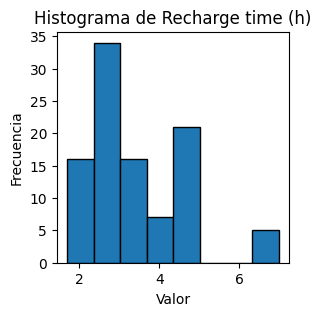

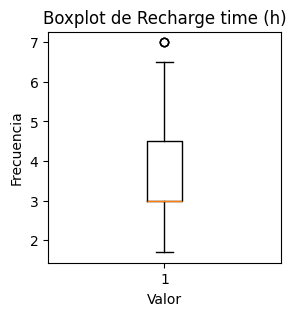







Columna: City (l/100 miles)  

Modal: 12.87, 13.68             Promedio: 14.5                     Mediana: 13.68                   

Límite inferior: 0.64           Límite superior: 27.68             Outliers: 3               




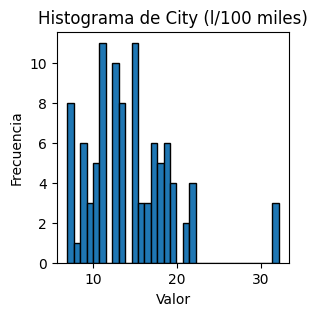

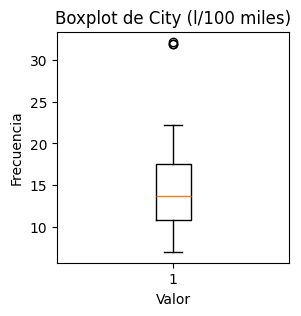







Columna: Highway (l/100 miles)

Modal: 13.84, 14.0              Promedio: 13.23                    Mediana: 13.03                   

Límite inferior: 6.19           Límite superior: 19.71             Outliers: 3               




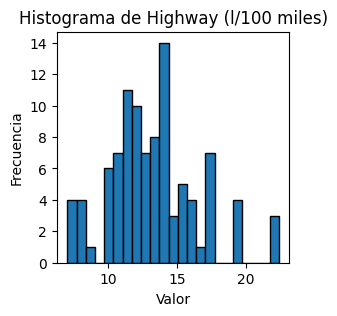

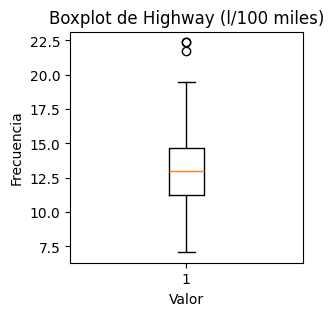







Columna: Combined (l/100 miles)

Modal: 10.78                    Promedio: 13.93                    Mediana: 13.68                   

Límite inferior: 2.81           Límite superior: 24.06             Outliers: 3               




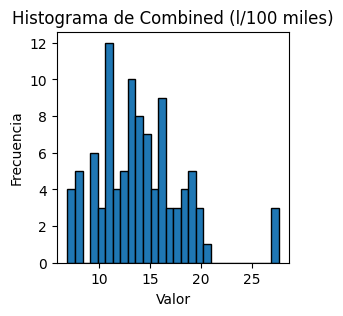

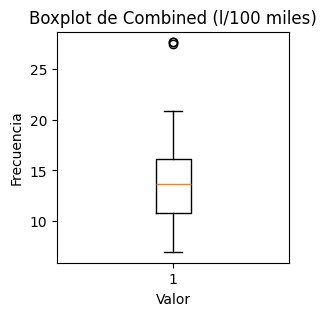







Columna: Range 2 (miles)     

Modal: 389.06                   Promedio: 430.97                   Mediana: 426.97                  

Límite inferior: 241.76         Límite superior: 634.56            Outliers: 0               




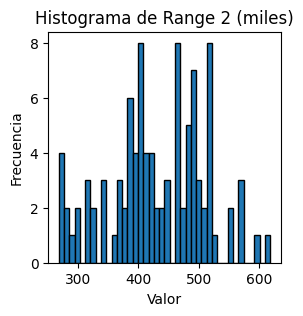

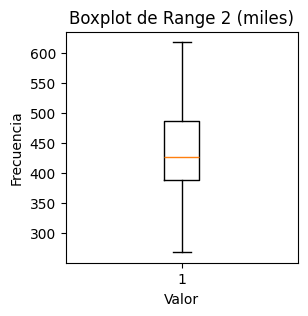







Columna: CO2 emissions (g/miles)

Modal: 104.58                   Promedio: 144.4                    Mediana: 120.68                  

Límite inferior: 0              Límite superior: 345.12            Outliers: 0               




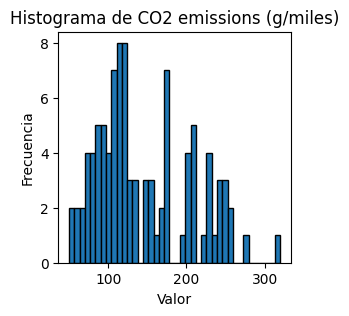

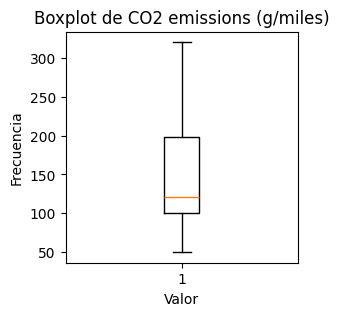

In [9]:
columnas_outliers = []
for columna in df.columns[5:]:
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    modal = ''
    for valor in df[columna].mode().to_list():
        modal += str(valor) + ', '
    modal = modal[:-2]
    promedio = round(df[columna].mean(), 2)
    mediana = round(df[columna].median(), 2)
    limite_superior = round(q3 + 1.5 * iqr, 2)
    limite_inferior = round(q1 - 1.5 * iqr, 2)
    if limite_inferior < 0:
        limite_inferior = 0
    outliers = df[columna][(df[columna] > limite_superior) | (df[columna] < limite_inferior)].count()
    if outliers > 0:
        columnas_outliers.append({'Columna': columna, 'Cantidad de outliers': outliers,
                                  'Límite inferior': limite_inferior, 'Límite superior': limite_superior,
                                  'Índices': df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)].index.to_list()})
    print(f'\nColumna: {columna:<20}\n\nModal: {modal:<24} Promedio: {promedio:<24} Mediana: {mediana:<24}\n\nLímite inferior: {limite_inferior:<14} Límite superior: {limite_superior:<17} Outliers: {outliers:<16}\n\n')
    bins = (int(df[columna].max() +1) if df[columna].max() <= 40 else 40)
    plt.figure(figsize=(3,3))
    plt.hist(df[columna], bins=bins, edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()
    print('\n\n')
    plt.figure(figsize=(3,3))
    plt.boxplot(df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()
    print('\n\n\n\n')

### Revisión de outliers

In [10]:
columnas_outliers

[{'Columna': 'Recharge time (h)',
  'Cantidad de outliers': 3,
  'Límite inferior': 0.75,
  'Límite superior': 6.75,
  'Índices': [43, 74, 75]},
 {'Columna': 'City (l/100 miles)',
  'Cantidad de outliers': 3,
  'Límite inferior': 0.64,
  'Límite superior': 27.68,
  'Índices': [43, 74, 75]},
 {'Columna': 'Highway (l/100 miles)',
  'Cantidad de outliers': 3,
  'Límite inferior': 6.19,
  'Límite superior': 19.71,
  'Índices': [43, 74, 75]},
 {'Columna': 'Combined (l/100 miles)',
  'Cantidad de outliers': 3,
  'Límite inferior': 2.81,
  'Límite superior': 24.06,
  'Índices': [43, 74, 75]}]

En varias columnas se repiten los índices 43, 74, 75.


In [11]:
df.loc[[43, 74, 75]]

,Model year,Make,Model,Vehicle class,Range 1 (miles),Recharge time (h),City (l/100 miles),Highway (l/100 miles),Combined (l/100 miles),Range 2 (miles),CO2 emissions (g/miles)
43,2023,BMW,XM,Sport utility vehicle: Standard,31.08,7.0,32.02,22.37,27.67,267.87,244.57
74,2024,BMW,XM,Sport utility vehicle: Standard,31.08,7.0,32.02,22.37,27.67,267.87,244.57
75,2024,BMW,XM Label Red,Sport utility vehicle: Standard,31.08,7.0,32.18,21.72,27.51,270.98,255.83


Comparado con otros vehículos el BMW cuenta con una eficiencia no muy alta, pero son grandes y utilitarios. Sin embargo, los valores no son erróneos, por lo que no borramos estos registros.

## Análisis de datos

In [12]:
df.head()

,Model year,Make,Model,Vehicle class,Range 1 (miles),Recharge time (h),City (l/100 miles),Highway (l/100 miles),Combined (l/100 miles),Range 2 (miles),CO2 emissions (g/miles)
0,2022,Audi,A7 Sportback 55 TFSI e quattro,Mid-size,26.10,3.0,15.29,12.07,13.84,387.20,125.50
1,2022,Audi,Q5 55 TFSI e quattro,Sport utility vehicle: Small,23.00,3.0,15.12,14.16,14.64,369.17,148.03
2,2022,Bentley,Flying Spur Hybrid,Mid-size,21.13,3.0,22.04,17.22,19.79,405.84,251.00
3,2022,BMW,530e xDrive,Mid-size,19.27,3.0,16.89,13.52,15.29,302.05,202.73
4,2022,BMW,745Le xDrive,Full-size,16.78,3.0,19.63,14.64,17.38,270.35,244.57


Determinaremos la eficiencia del vehículo creando una columna que indique el rango total (batería totalmente cargada + tanque totalmente lleno). Este rango no es totalmente exacto y depende de cada vehículo, ya que nunca se agota el total de la carga. Vamos a tomar un coeficiente basándonos en un promedio general.

In [13]:
df['Total range (miles)'] = round(df['Range 1 (miles)']*.8 + df['Range 2 (miles)'],2)

Agregamos una columna con la cantidad de millas 
recorridas con una hora de carga (solo en modo eléctrico).

In [14]:
df['Miles per charging hour'] = round(df['Range 1 (miles)'] / df['Recharge time (h)'],2)

### Top 10 de vehículos con mayor autonomía total

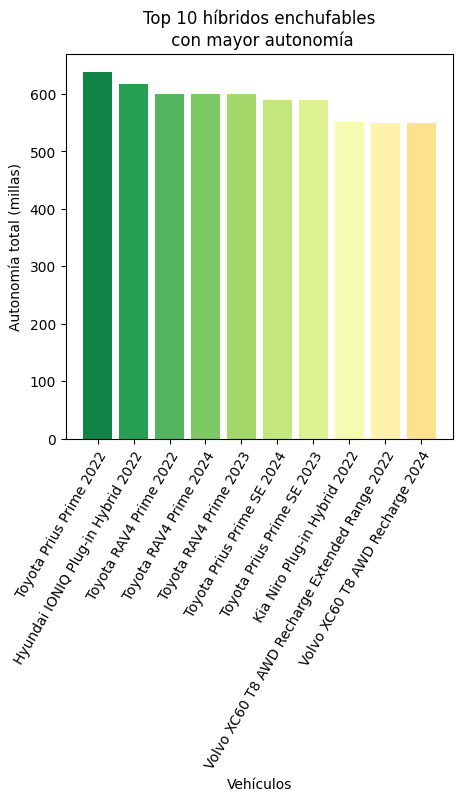

In [15]:
marca = df.sort_values(by='Total range (miles)', ascending=False).head(10)['Make'].to_list()
modelo = df.sort_values(by='Total range (miles)', ascending=False).head(10)['Model'].to_list()
año = df.sort_values(by='Total range (miles)', ascending=False).head(10)['Model year'].to_list()
autonomia = df.sort_values(by='Total range (miles)', ascending=False).head(10)['Total range (miles)'].to_list()
vehiculos = []
for i in range(10):
    vehiculo = f'{marca[i]} {modelo[i]} {str(año[i])}'
    vehiculos.append(vehiculo)
plt.figure(figsize=(5,5))
plt.bar(vehiculos, autonomia, color=plt.cm.RdYlGn_r([i/16.8 for i in range(1,11)]))
plt.xlabel('Vehículos')
plt.ylabel('Autonomía total (millas)')
plt.title('Top 10 híbridos enchufables\n con mayor autonomía')
plt.xticks(rotation=60, ha='right', rotation_mode='anchor')
plt.show()

### Top 5 de vehículos con mayor autonomía en modo eléctrico

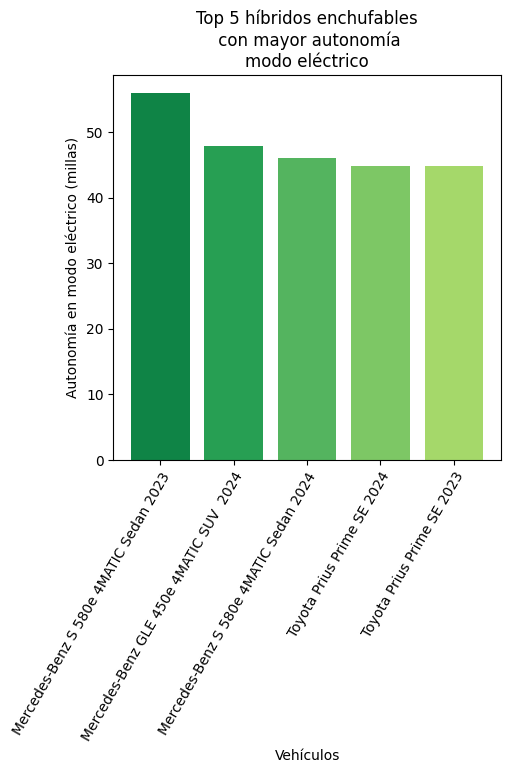

In [16]:
marca = df.sort_values(by='Range 1 (miles)', ascending=False).head(5)['Make'].to_list()
modelo = df.sort_values(by='Range 1 (miles)', ascending=False).head(5)['Model'].to_list()
año = df.sort_values(by='Range 1 (miles)', ascending=False).head(5)['Model year'].to_list()
autonomia = df.sort_values(by='Range 1 (miles)', ascending=False).head(5)['Range 1 (miles)'].to_list()
vehiculos = []
for i in range(5):
    vehiculo = f'{marca[i]} {modelo[i]} {str(año[i])}'
    vehiculos.append(vehiculo)
plt.figure(figsize=(5,5))
plt.bar(vehiculos, autonomia, color=plt.cm.RdYlGn_r([i/16.8 for i in range(1,6)]))
plt.xlabel('Vehículos')
plt.ylabel('Autonomía en modo eléctrico (millas)')
plt.title('Top 5 híbridos enchufables\n con mayor autonomía\nmodo eléctrico')
plt.xticks(rotation=60, ha='right', rotation_mode='anchor')
plt.show()

### Top 5 de vehículos con mayor rendimiento en ciudad

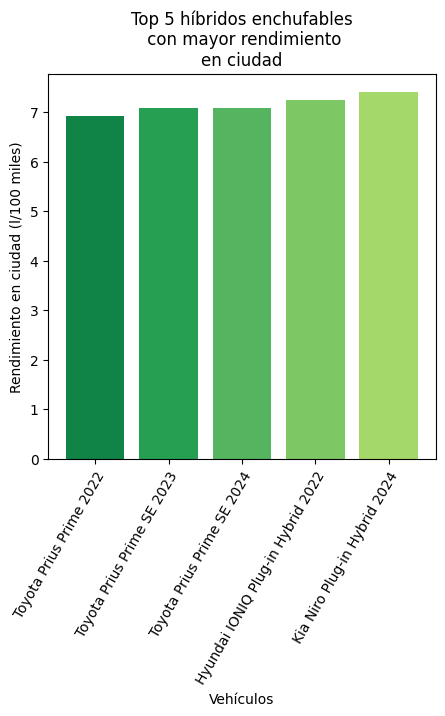

In [17]:
marca = df.sort_values(by='City (l/100 miles)').head(5)['Make'].to_list()
modelo = df.sort_values(by='City (l/100 miles)').head(5)['Model'].to_list()
año = df.sort_values(by='City (l/100 miles)').head(5)['Model year'].to_list()
rendimiento = df.sort_values(by='City (l/100 miles)').head(5)['City (l/100 miles)'].to_list()
vehiculos = []
for i in range(5):
    vehiculo = f'{marca[i]} {modelo[i]} {str(año[i])}'
    vehiculos.append(vehiculo)
plt.figure(figsize=(5,5))
plt.bar(vehiculos, rendimiento, color=plt.cm.RdYlGn_r([i/16.8 for i in range(1,6)]))
plt.xlabel('Vehículos')
plt.ylabel('Rendimiento en ciudad (l/100 miles)')
plt.title('Top 5 híbridos enchufables\n con mayor rendimiento\nen ciudad')
plt.xticks(rotation=60, ha='right', rotation_mode='anchor')
plt.show()

### Matriz de correlación

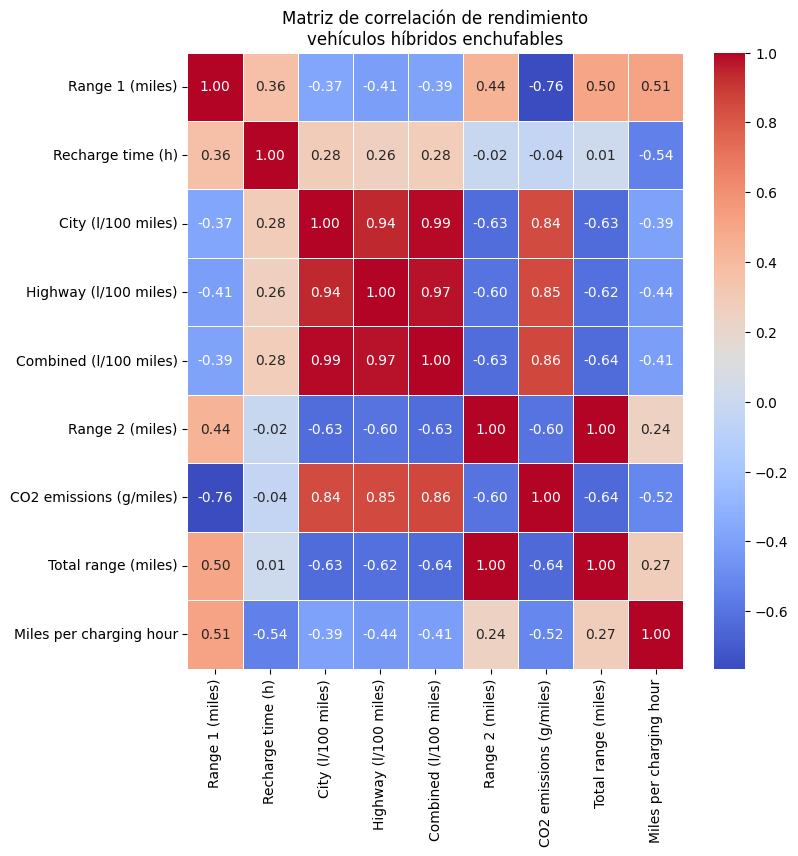

In [18]:
matriz = df.iloc[:,4:].corr()
matriz

plt.figure(figsize=(8,8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación de rendimiento\nvehículos híbridos enchufables')
plt.show()

#### Conclusión preliminar

AL observar distintas características del rendimiento de los híbridos enchufables, evaluamos que el Toyota Prius Prime podría ser una buena alternativa para implementar una flota de vehículos como no estmoas trabajando con toda la data no es informacion concluyente.

In [19]:
nombres_normalizados = {'Model year':'model_year', 'Make':'make', 'Model':'model', 'Vehicle class':'vehicle_class',
                        'Range 1 (miles)':'range_1_(miles)', 'Recharge time (h)':'recharge_time_(h)', 'City (l/100 miles)':'city_(l/100_miles)',
                        'Highway (l/100 miles)':'highway_(l/100_miles)', 'Combined (l/100 miles)':'combined_(l/100_miles)',
                        'Range 2 (miles)':'range_2_(miles)', 'CO2 emissions (g/miles)':'co2(g/miles)', 'EM le/100 miles':'em_le/100_miles',
                        'EM KWh/100 miles':'em_kwh/100_miles', 'EM aditional fuel l/100 miles':'em_aditional_fuel_l/100_miles',
                        'Total range (miles)':'total_range_(miles)', 'Miles per charging hour':'miles_per_charging hour'}

In [20]:
df.rename(columns=nombres_normalizados, inplace=True)

In [21]:
df.to_csv(rendimiento_hibridos_limpio, sep=',', encoding='utf-8')